In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from IPython import display
%matplotlib inline

In [12]:
url_path = './zvuk/bonobo_towers.wav'
display.Audio(url=url_path)

In [13]:
Fs, stereo_samples = wavfile.read(url_path)

In [14]:
print("Frequency: {}Hz".format(Fs))

Frequency: 44100Hz


In [15]:
print("Samples size: {}".format(len(stereo_samples)))

Samples size: 1323000


In [16]:
# Prebacivanje na mono
samples = stereo_samples.mean(axis = 1)

In [22]:
# racunamo trajanje u sekundama
duration = samples.shape[0]*1.0/Fs
print("Duration: {} seconds".format(duration))

Duration: 30.0 seconds


In [25]:
N = Fs/2
t = np.linspace(0, 0.5, N)
freq = np.fft.fftfreq(N, 1./Fs)
subsamples = samples[:N]
c = np.fft.fft(subsamples)

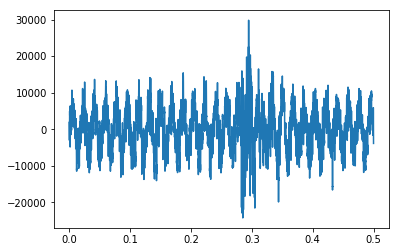

In [26]:
plt.plot(t, subsamples)

In [27]:
mask = (freq > 0) * (freq < 1000)

In [28]:
mask

array([False,  True,  True, ..., False, False, False])

<StemContainer object of 3 artists>

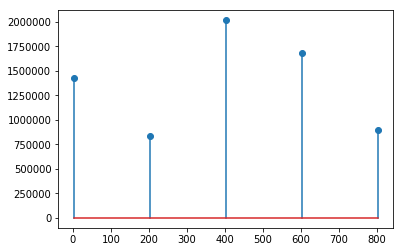

In [31]:
c_filtered = c[mask]
freq_filtered = freq[mask]
plt.stem(freq_filtered[::100], np.abs(c_filtered[::100]))

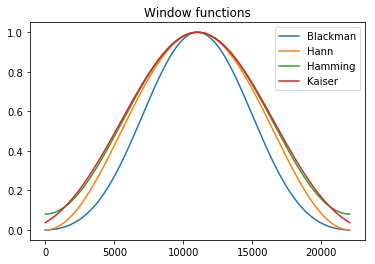

In [36]:
plt.title('Window functions')
plt.plot(np.arange(0, N), signal.windows.blackman(N))
plt.plot(np.arange(0, N), signal.windows.hann(N))
plt.plot(np.arange(0, N), signal.windows.hamming(N))
plt.plot(np.arange(0, N), signal.windows.kaiser(N, 5))
plt.legend(['Blackman', 'Hann', 'Hamming', 'Kaiser'])

In [37]:
N

22050

In [38]:
window = signal.windows.hamming(N)

In [39]:
window

array([0.08      , 0.08000002, 0.08000007, ..., 0.08000007, 0.08000002,
       0.08      ])

In [45]:
spectrogram_frequencies = freq_filtered.size
time_segment = 0.5
spectrogram_time = int(duration // time_segment)
spectrogram = np.zeros((spectrogram_time, spectrogram_frequencies))
print("Spectrogram frequencies: {}".format(spectrogram_frequencies))
print("Spectrogram time: {}".format(spectrogram_time))
print("Spectrogram shape: {}".format(spectrogram.shape))

Spectrogram frequencies: 499
Spectrogram time: 60
Spectrogram shape: (60, 499)


In [58]:
data = samples

In [88]:
freqs, times, Sxx = signal.spectrogram(samples, fs=Fs, scaling='spectrum')

Text(0,0.5,'Frequency [Hz]')

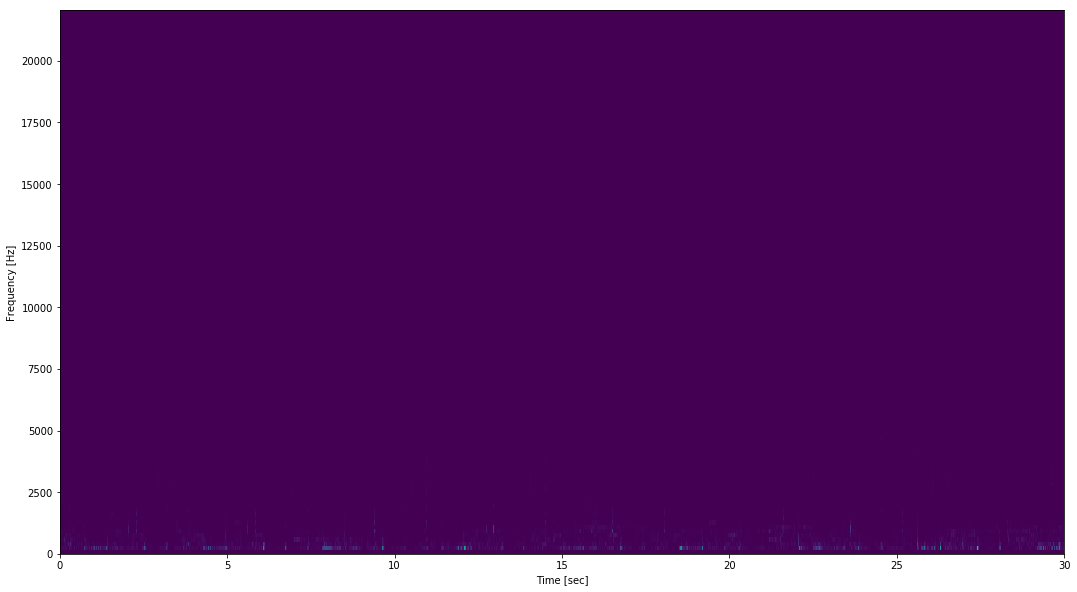

In [89]:
plt.figure(figsize=(18, 10))
plt.pcolormesh(times, freqs, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

TypeError: Dimensions of C (129, 5906) are incompatible with X (129) and/or Y (5906); see help(pcolormesh)

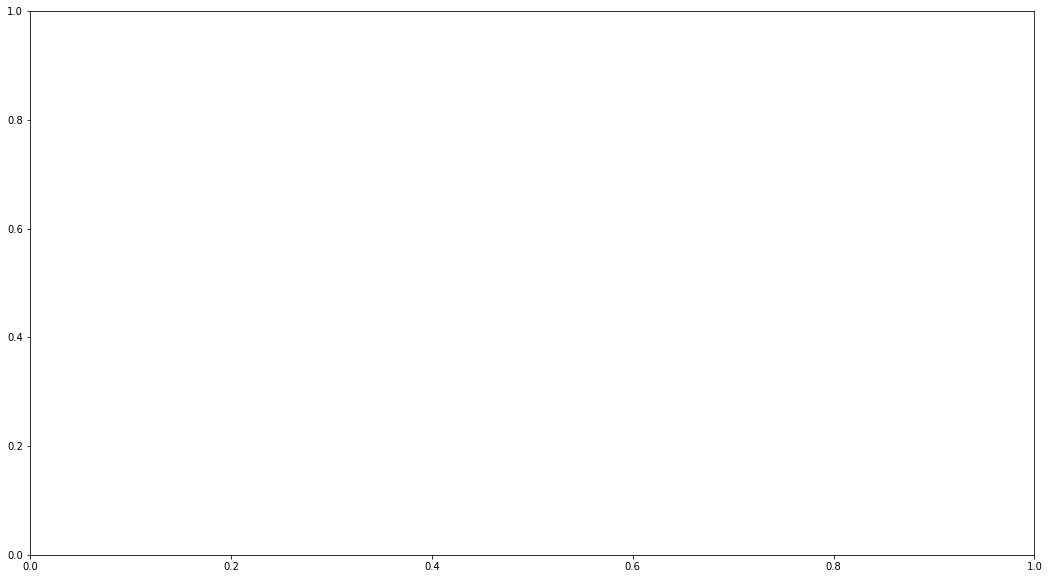

In [90]:
plt.figure(figsize=(18, 10))
plt.pcolormesh(freqs, times, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')